# Imports

In [1]:
import sdf_helper as sh
import matplotlib.pyplot as plt
import os
from matplotlib import colors
import sdf
plt.rcParams["font.size"]=13
import numpy as np

In [2]:
2*np.log(2)

1.3862943611198906

In [3]:
EXTENT = [-20,20, -25, 25]

# Parameters

- Simulation Box: $40\:\mu m\times40\:\mu m\times50\:\mu m$
- Number of Cells: $400\times400\times1000$
- Plasma Density: $n_0 = 10^{26} \: m^{-3}$
- Laser Intensity: $I = 10^{23} \: Wm^{-2}$
- Laser Wavelength: $\lambda = 10^{-6} \: m$
- Particle Per Cell: $2$
- FWHM of the Laser: $1 \:\mu m$
- Width of the Laser: $5 \:\mu m$
- The laser propagates in z direction and is s-polarized, that is, the electric field vector of the laser oscillates in the x axis.
- The laser starts at $(20\:\mu m\times20\:\mu m\times-2\:\mu m)$ which is the center of the xy-plane $2 \:\mu m$ in front of the
simulation box.

# Fields With Time

In [14]:
def plot_field(data_dir, ax, component="y"):
    raw_data = sdf.read(data_dir)
    comp = {
        "x":raw_data.Electric_Field_Ex,
        "y":raw_data.Electric_Field_Ey,
        "z":raw_data.Electric_Field_Ez,
    }
    field = comp[component].data
    t = raw_data.Header['time']*1e15
    field = field/(field.max()+1e-10)
    ax.imshow(field**2, cmap='jet', origin='lower',
    extent=EXTENT,
    aspect='auto',
    interpolation='nearest',
    # norm=colors.Normalize(vmin=-0.3, vmax=0.5),
    )
    ax.set_xlabel('$y \, [\mu m]$')
    ax.set_ylabel('$x \, [\mu m]$')
    ax.set_title(f't = {t:.0f} fs')

In [18]:
all_files = [f for f in os.listdir('.') if f.endswith('.sdf')]

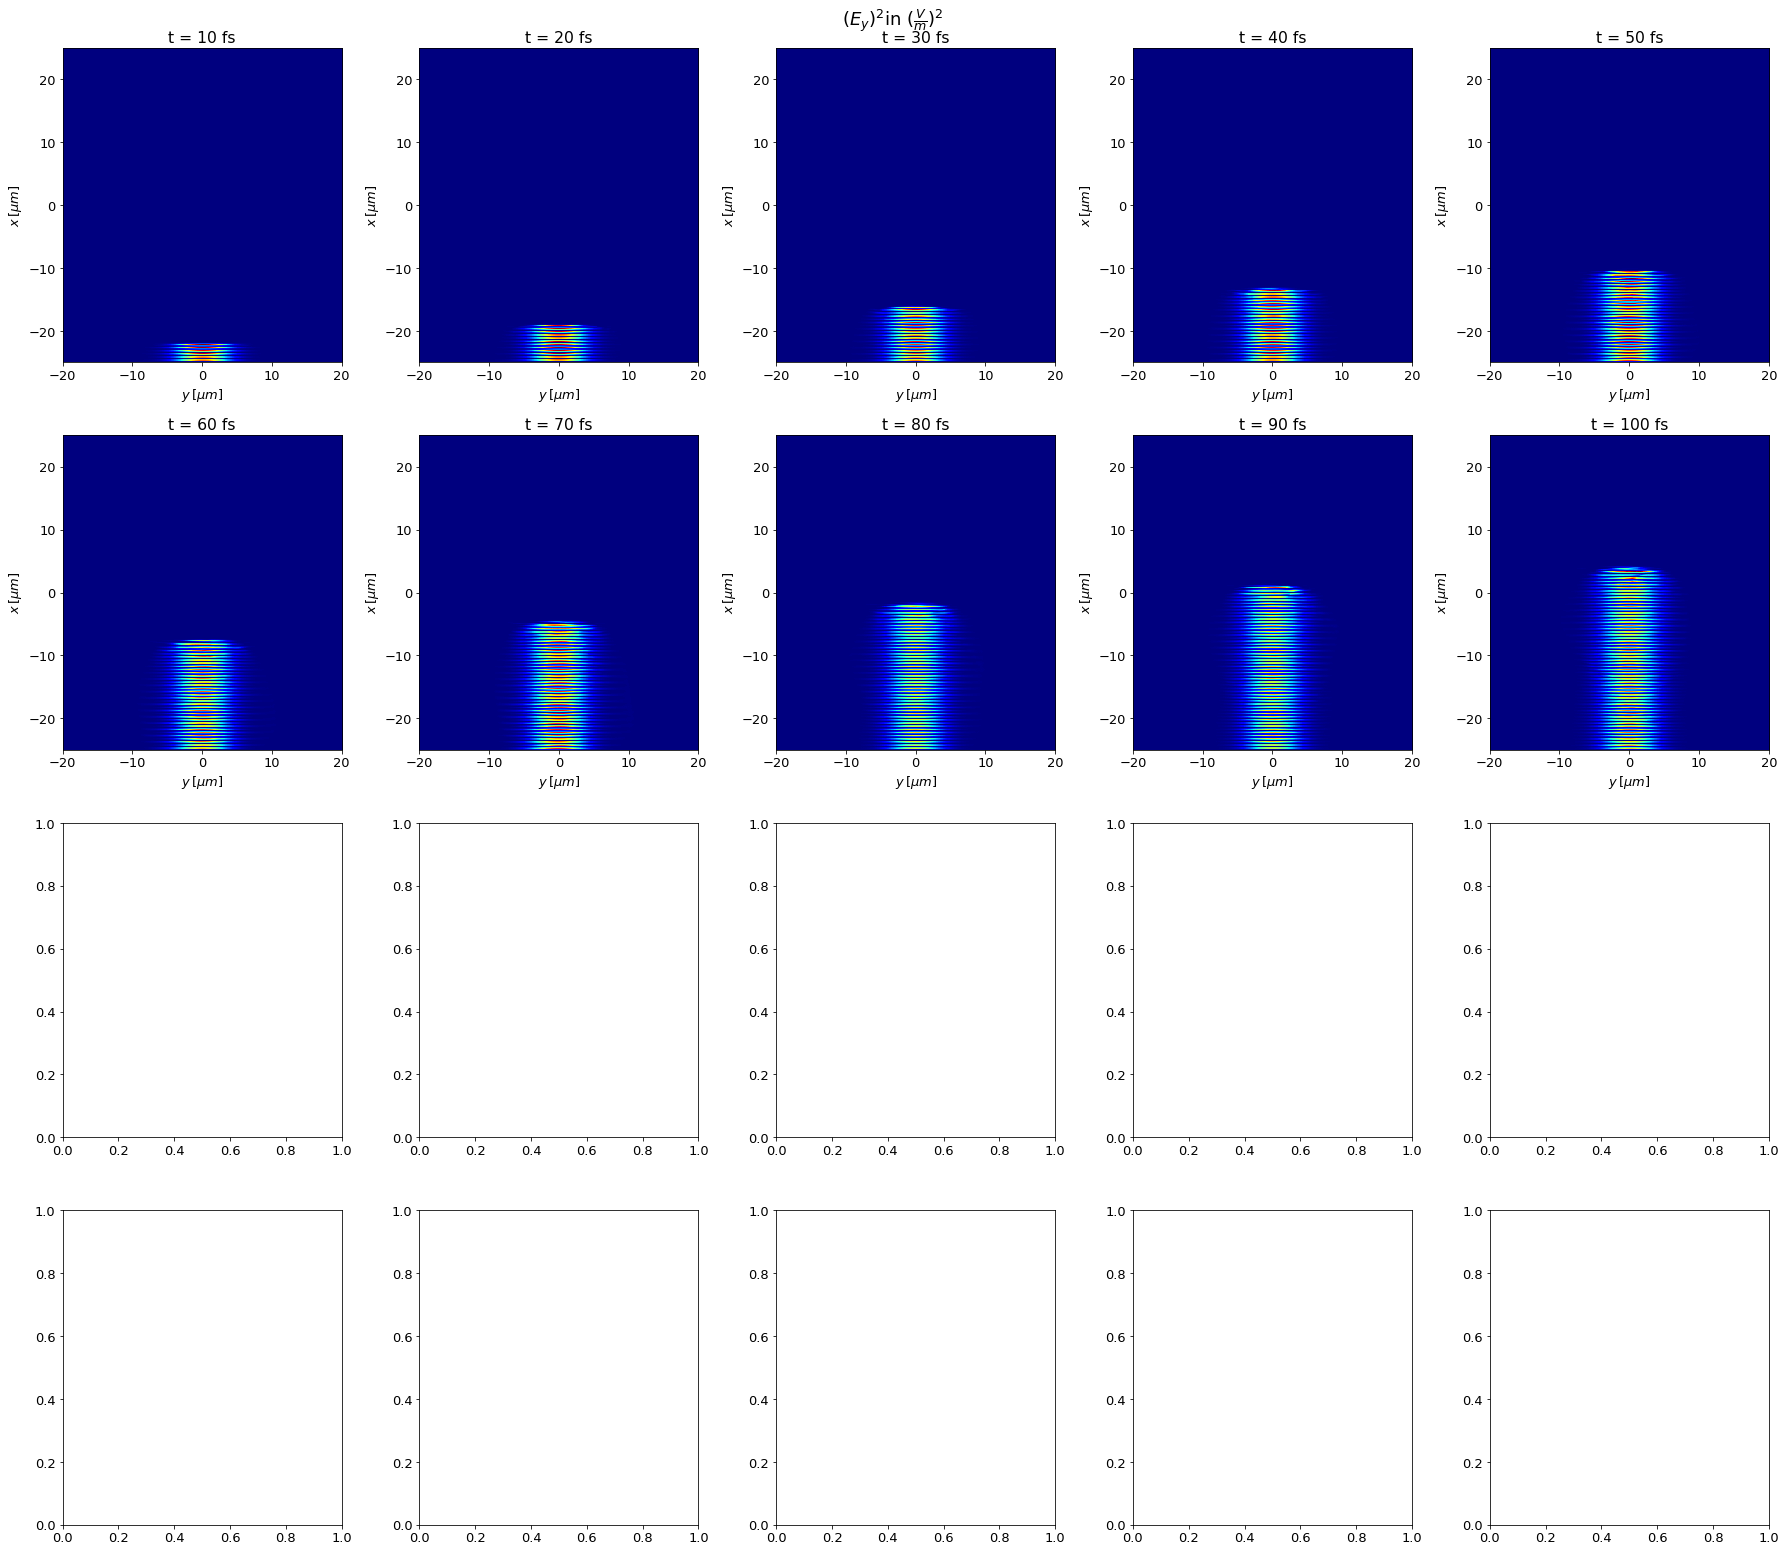

In [19]:
fig, ax = plt.subplots(4, 5, figsize=(25, 22))
i=0
component="y"
field = f"E_{component}"
fig.suptitle(rf"$({field})^2$" +r"in $({\frac{V}{m}})^2$", fontsize=18)
i=0
for data_dir in all_files[1:]:
    t = i*10
    plot_field(data_dir, ax[i // 5, i % 5],component=component)
    i += 1
fig.tight_layout()

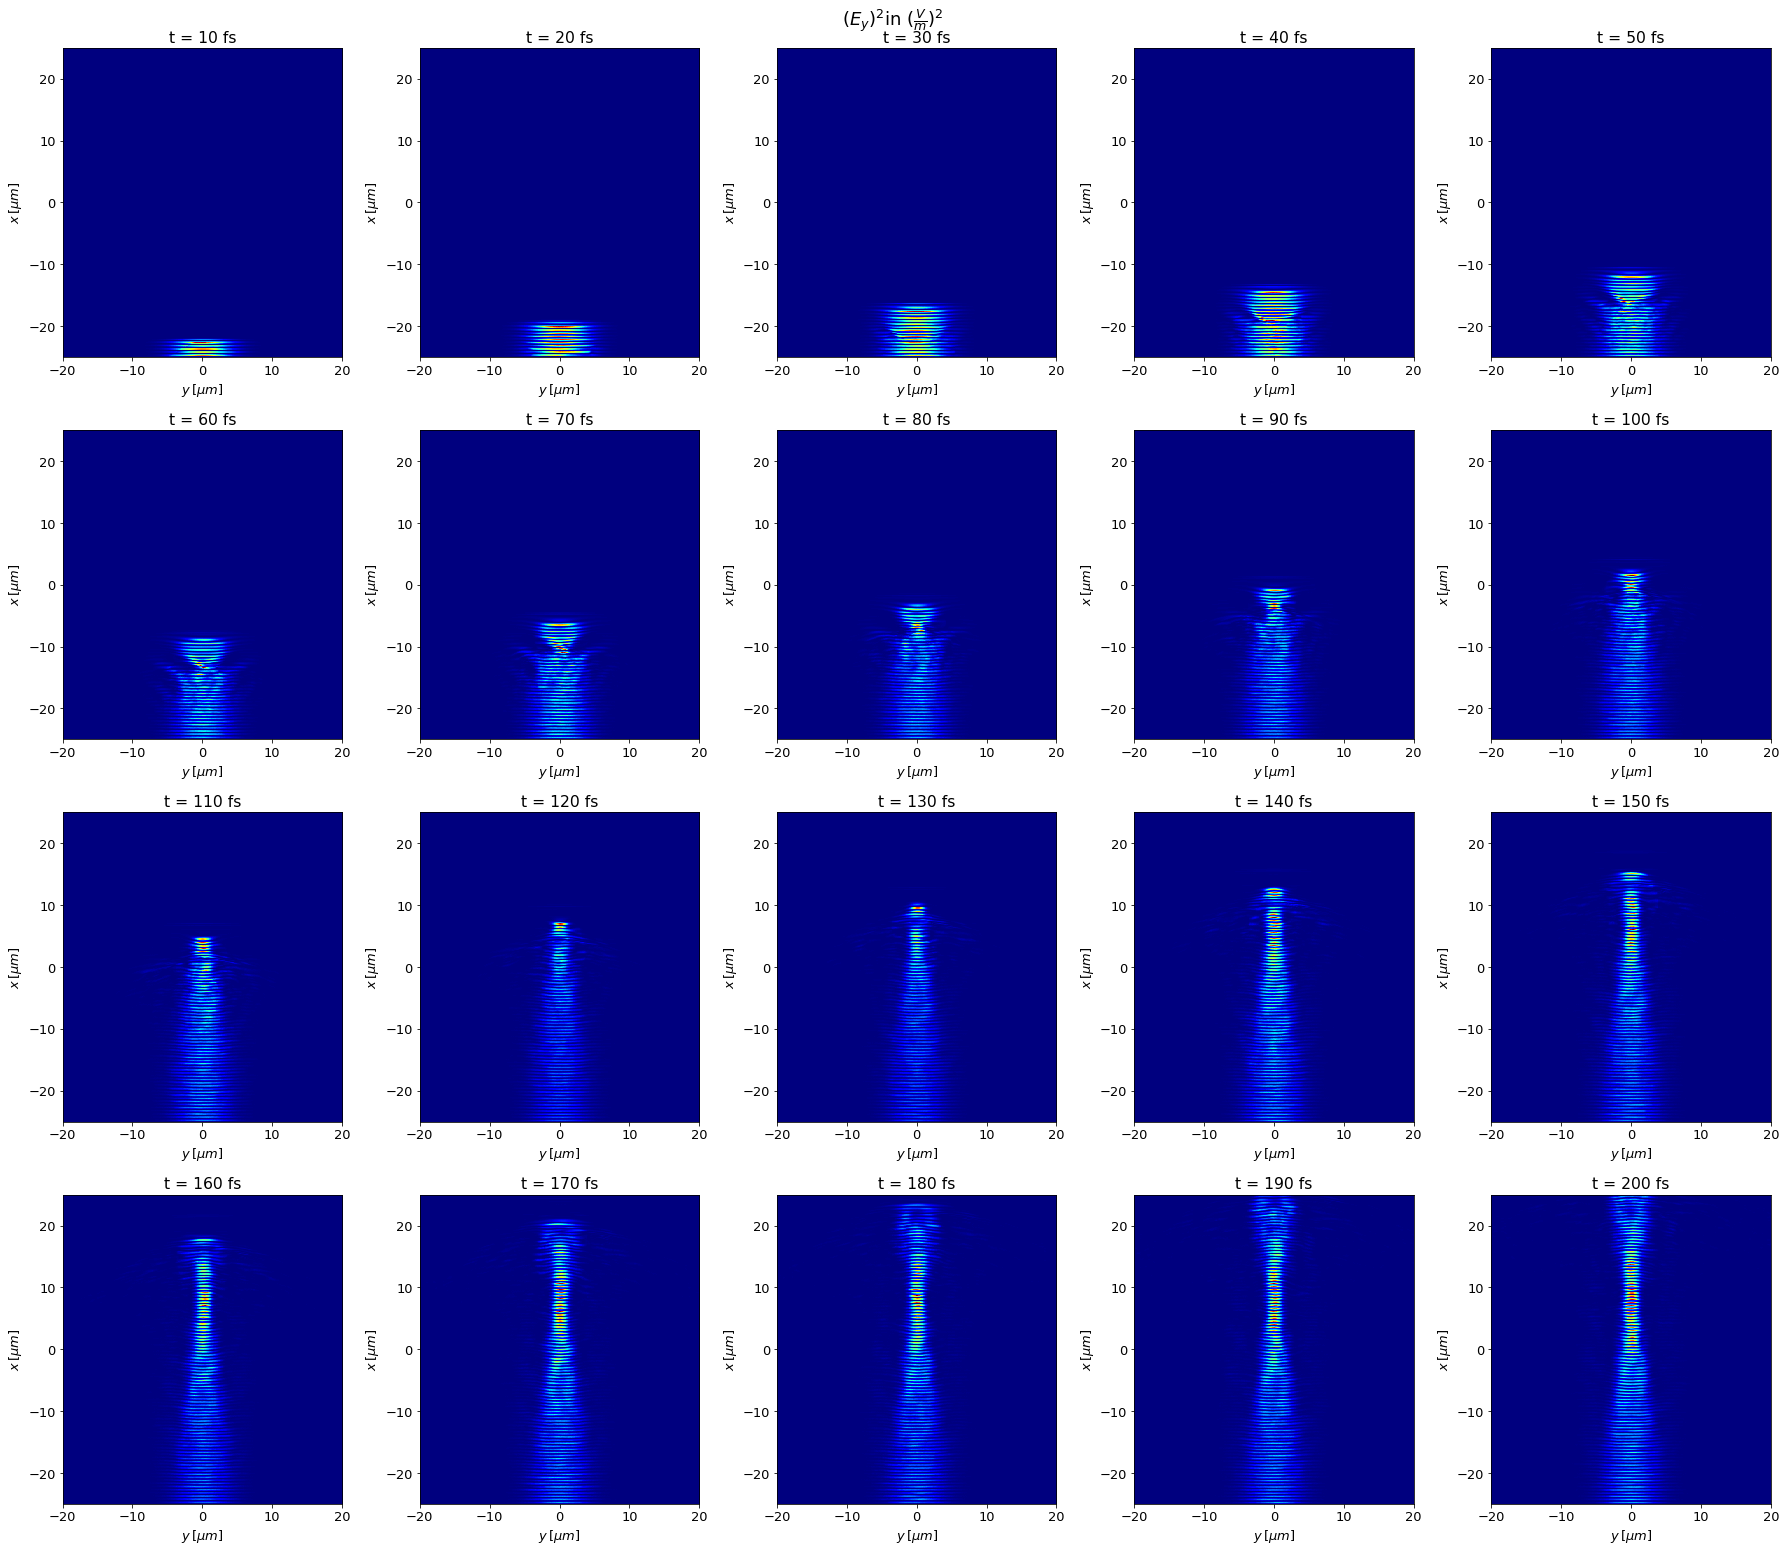

In [17]:
fig, ax = plt.subplots(4, 5, figsize=(25, 22))
i=0
component="y"
field = f"E_{component}"
fig.suptitle(rf"$({field})^2$" +r"in $({\frac{V}{m}})^2$", fontsize=18)
i=0
for data_dir in all_files[1:]:
    t = i*10
    plot_field(data_dir, ax[i // 5, i % 5],component=component)
    i += 1
fig.tight_layout()

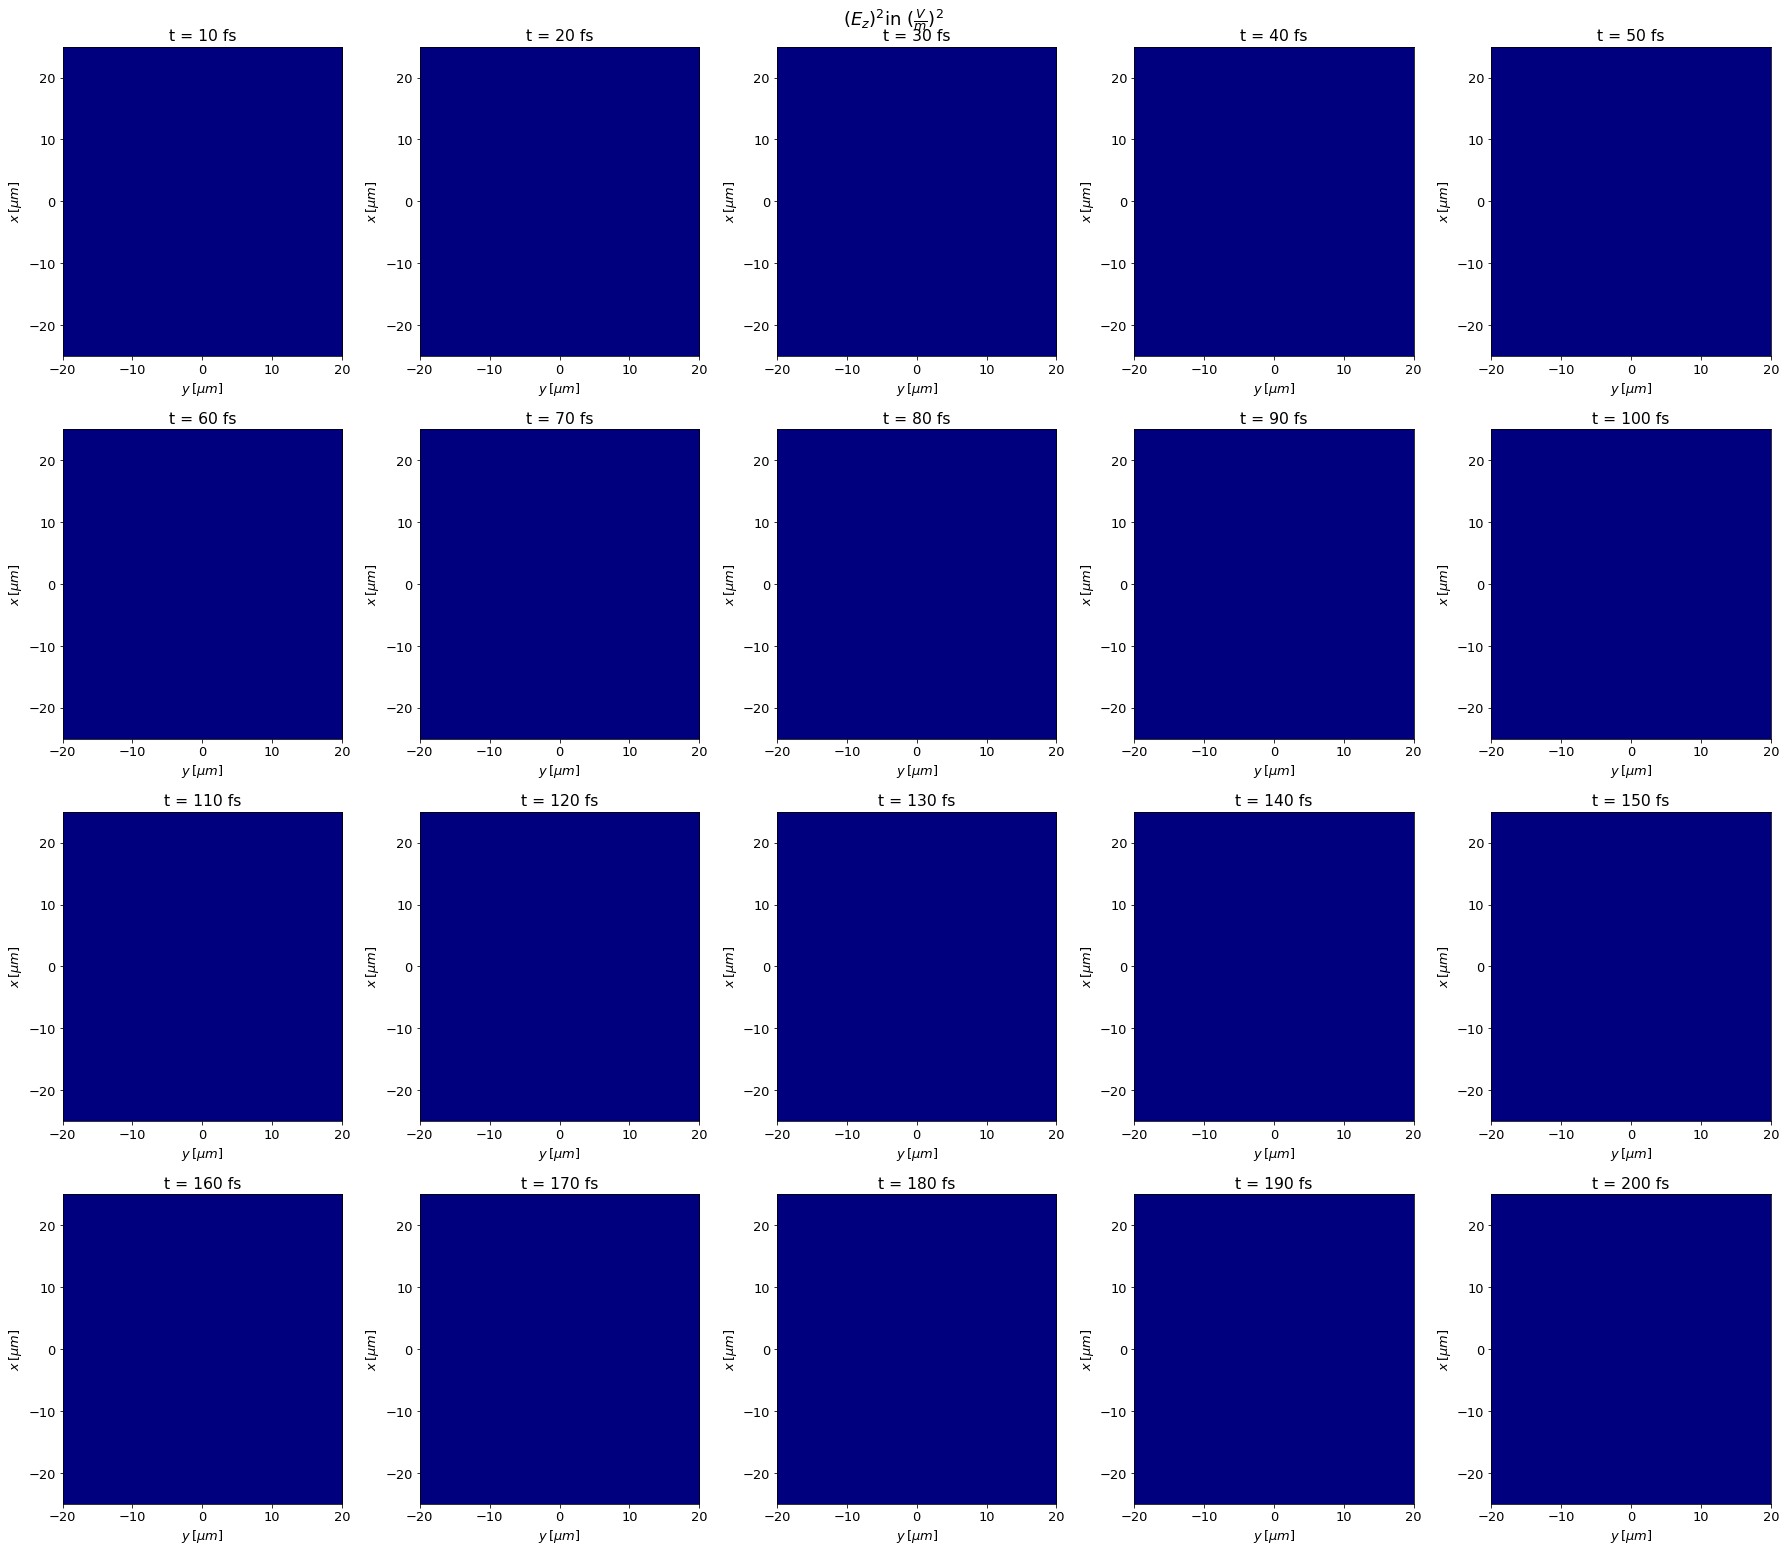

In [29]:
fig, ax = plt.subplots(4, 5, figsize=(25, 22))
i=0
component="z"
field = f"E_{component}"
fig.suptitle(rf"$({field})^2$" +r"in $({\frac{V}{m}})^2$", fontsize=18)
i=0
for data_dir in all_files[1:]:
    t = i*10
    plot_field(data_dir, ax[i // 5, i % 5],component=component)
    i += 1
fig.tight_layout()

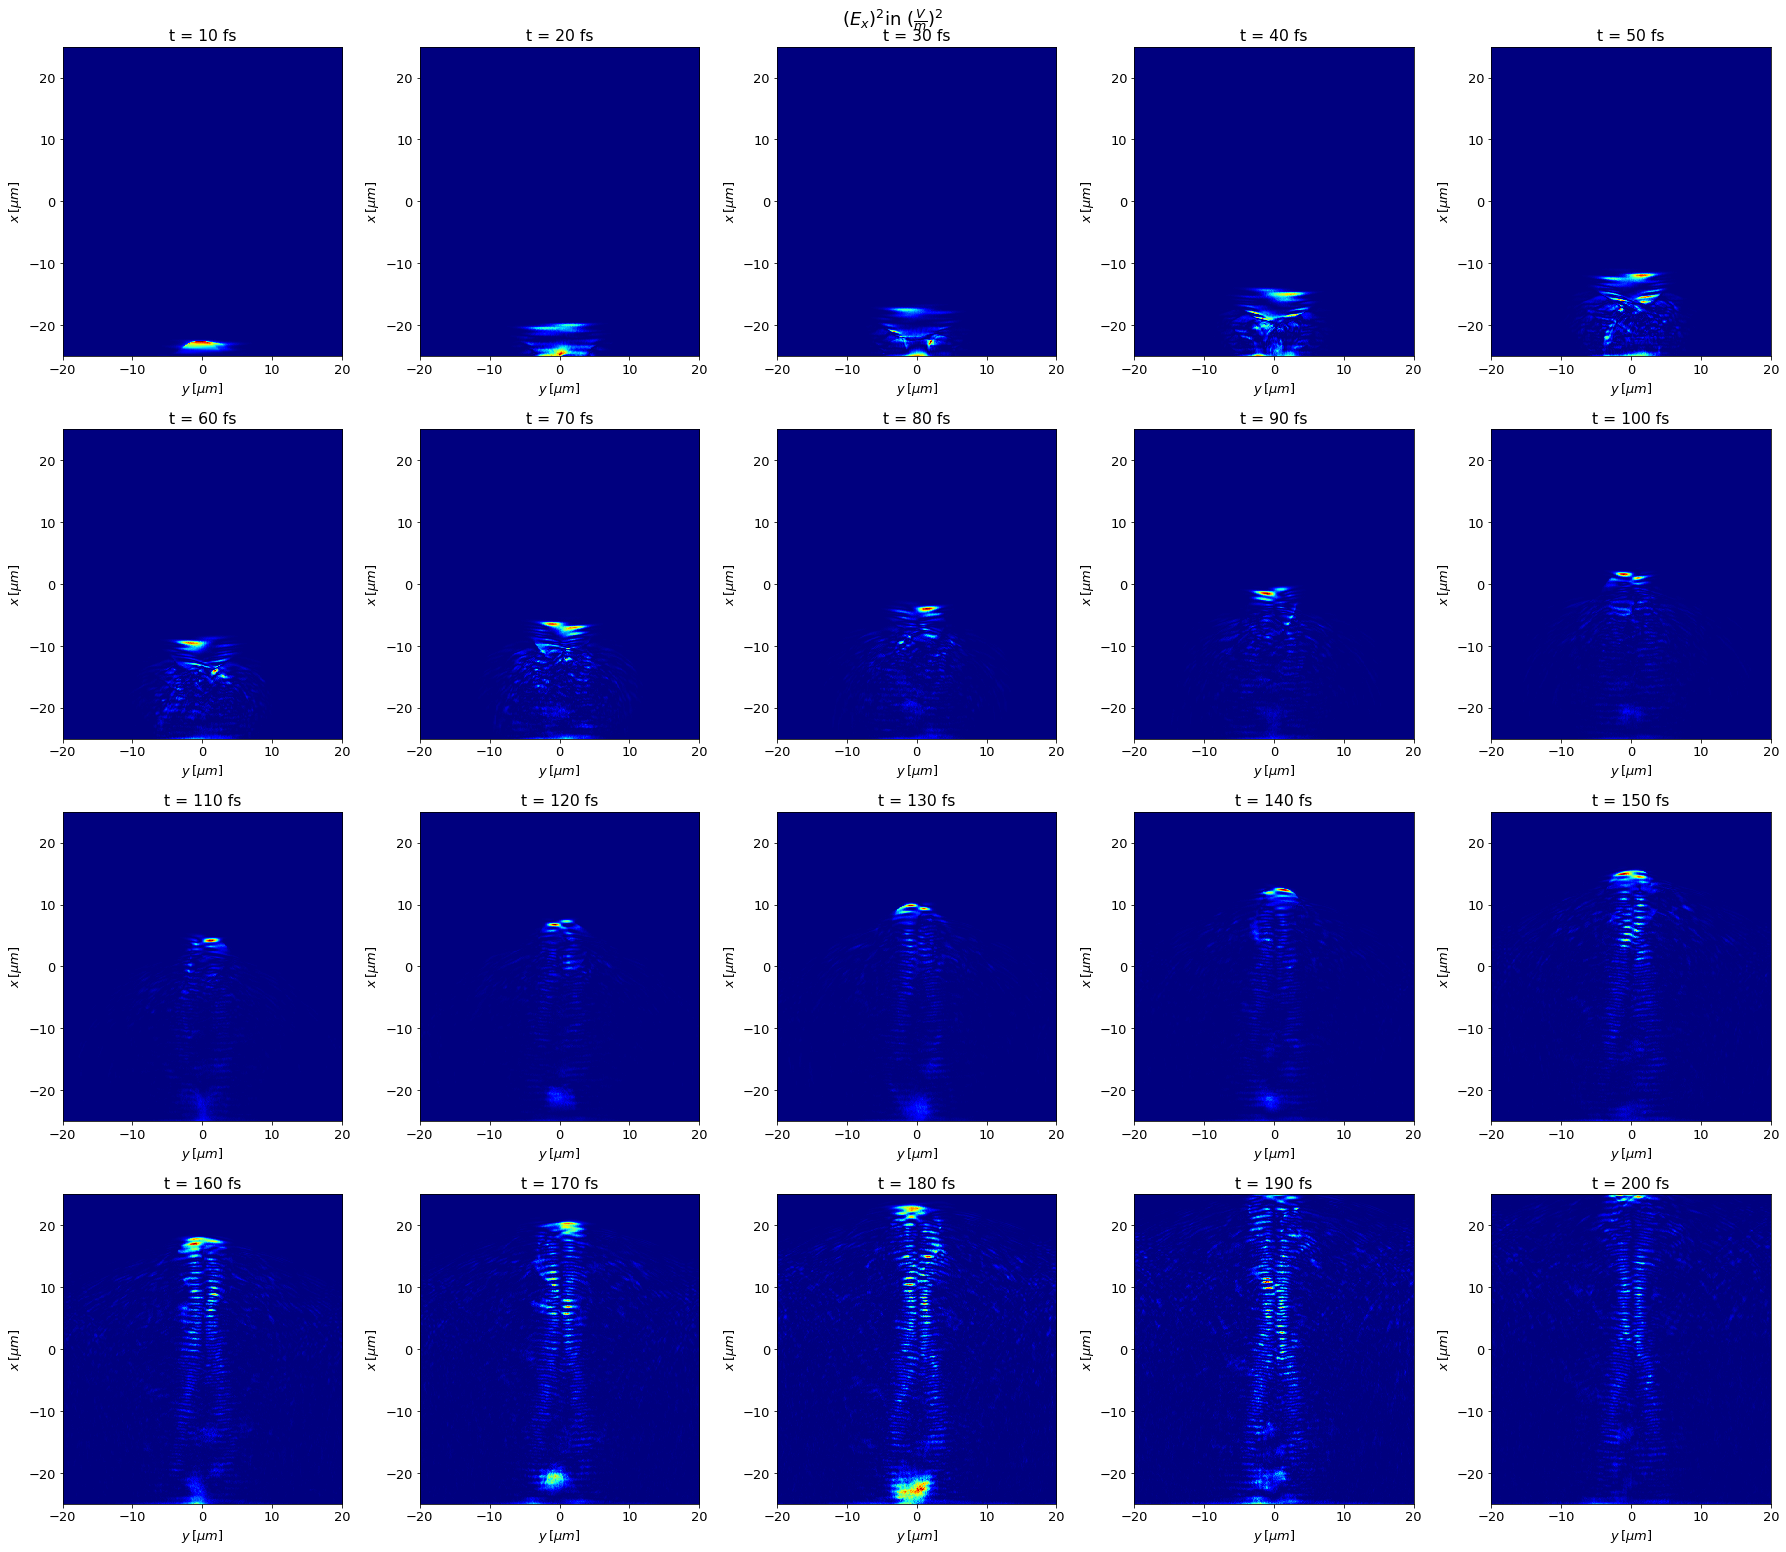

In [30]:
fig, ax = plt.subplots(4, 5, figsize=(25, 22))
i=0
component="x"
field = f"E_{component}"
fig.suptitle(rf"$({field})^2$" +r"in $({\frac{V}{m}})^2$", fontsize=18)
i=0
for data_dir in all_files[1:]:
    t = i*10
    plot_field(data_dir, ax[i // 5, i % 5],component=component)
    i += 1
fig.tight_layout()

# Field With Scale

In [31]:
def plot_with_scale(data_dir, component="x"):
    raw_data = sdf.read(data_dir)
    comp = {
        "x":raw_data.Electric_Field_Ex,
        "y":raw_data.Electric_Field_Ey,
        "z":raw_data.Electric_Field_Ez,
    }
    field = comp[component]

    t = raw_data.Header['time']*1e15
    c_label = f"$(E_{component})^2$ in $({field.units})^2$"
    
    plt.figure(figsize=(15,8))
    plt.imshow(field.data**2, cmap='viridis', origin='lower',
    extent=EXTENT,
    aspect='auto',
    )
    plt.xlabel('$Y \, [\mu m]$')
    plt.ylabel('$X \, [\mu m]$')
    plt.title(f't = {t:.0f} fs')
    cbar = plt.colorbar()
    cbar.ax.set_ylabel(c_label)

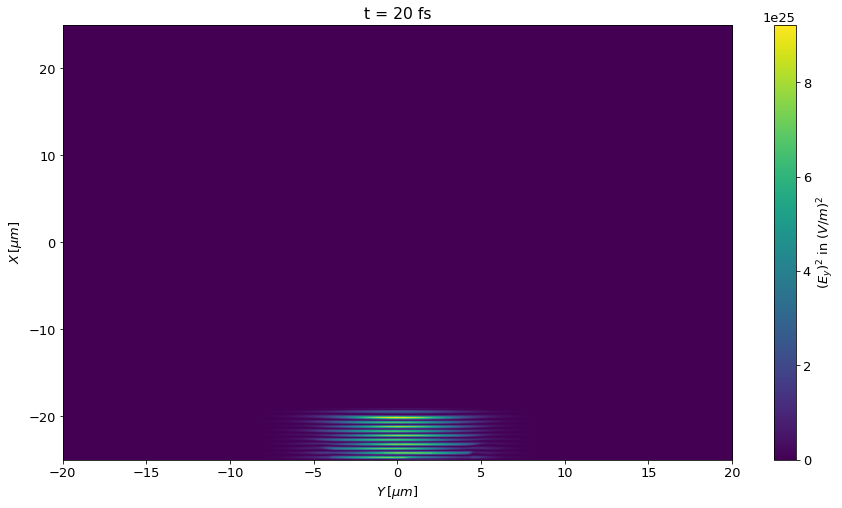

In [35]:
plot_with_scale("0002.sdf", component="y")

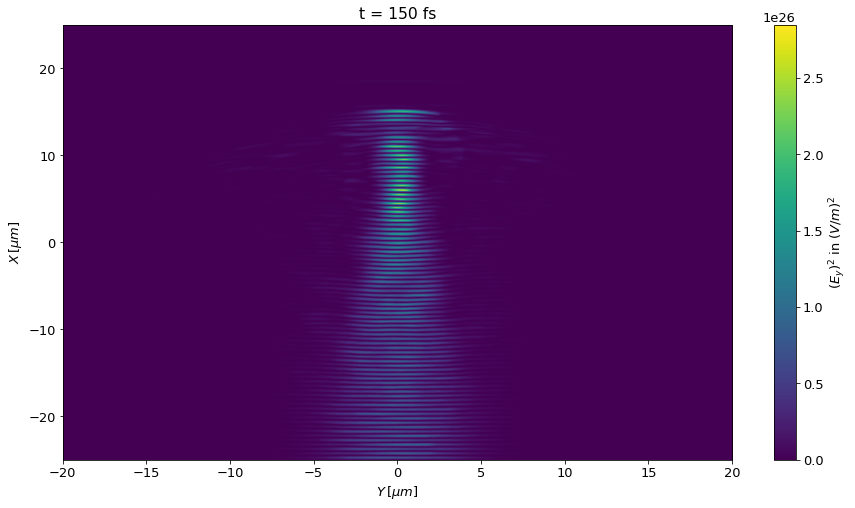

In [32]:
plot_with_scale("0015.sdf", component="y")

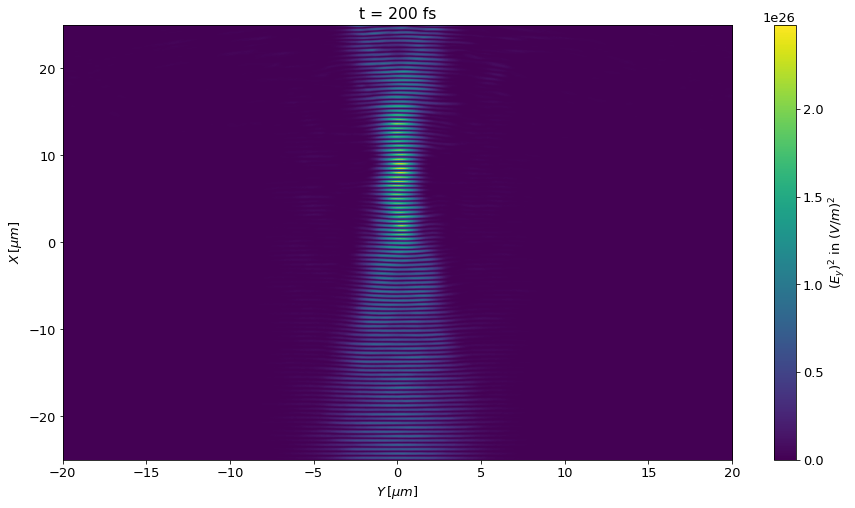

In [36]:
plot_with_scale("0020.sdf", component="y")

# Charge Density

In [33]:
def plot_charge(data_dir, ax):
    raw_data = sdf.read(data_dir)

    variable = raw_data.Derived_Charge_Density.data
    t = raw_data.Header['time']*1e15
    ax.imshow(variable, cmap='gray', origin='lower',
    extent=EXTENT,
    aspect='auto',
    interpolation='nearest',
    # norm=colors.Normalize(vmin=-0.06, vmax=-0.002),
    )
    ax.set_xlabel('$y \, [\mu m]$')
    ax.set_ylabel('$x \, [\mu m]$')
    ax.set_title(f't = {t:.0f} fs')

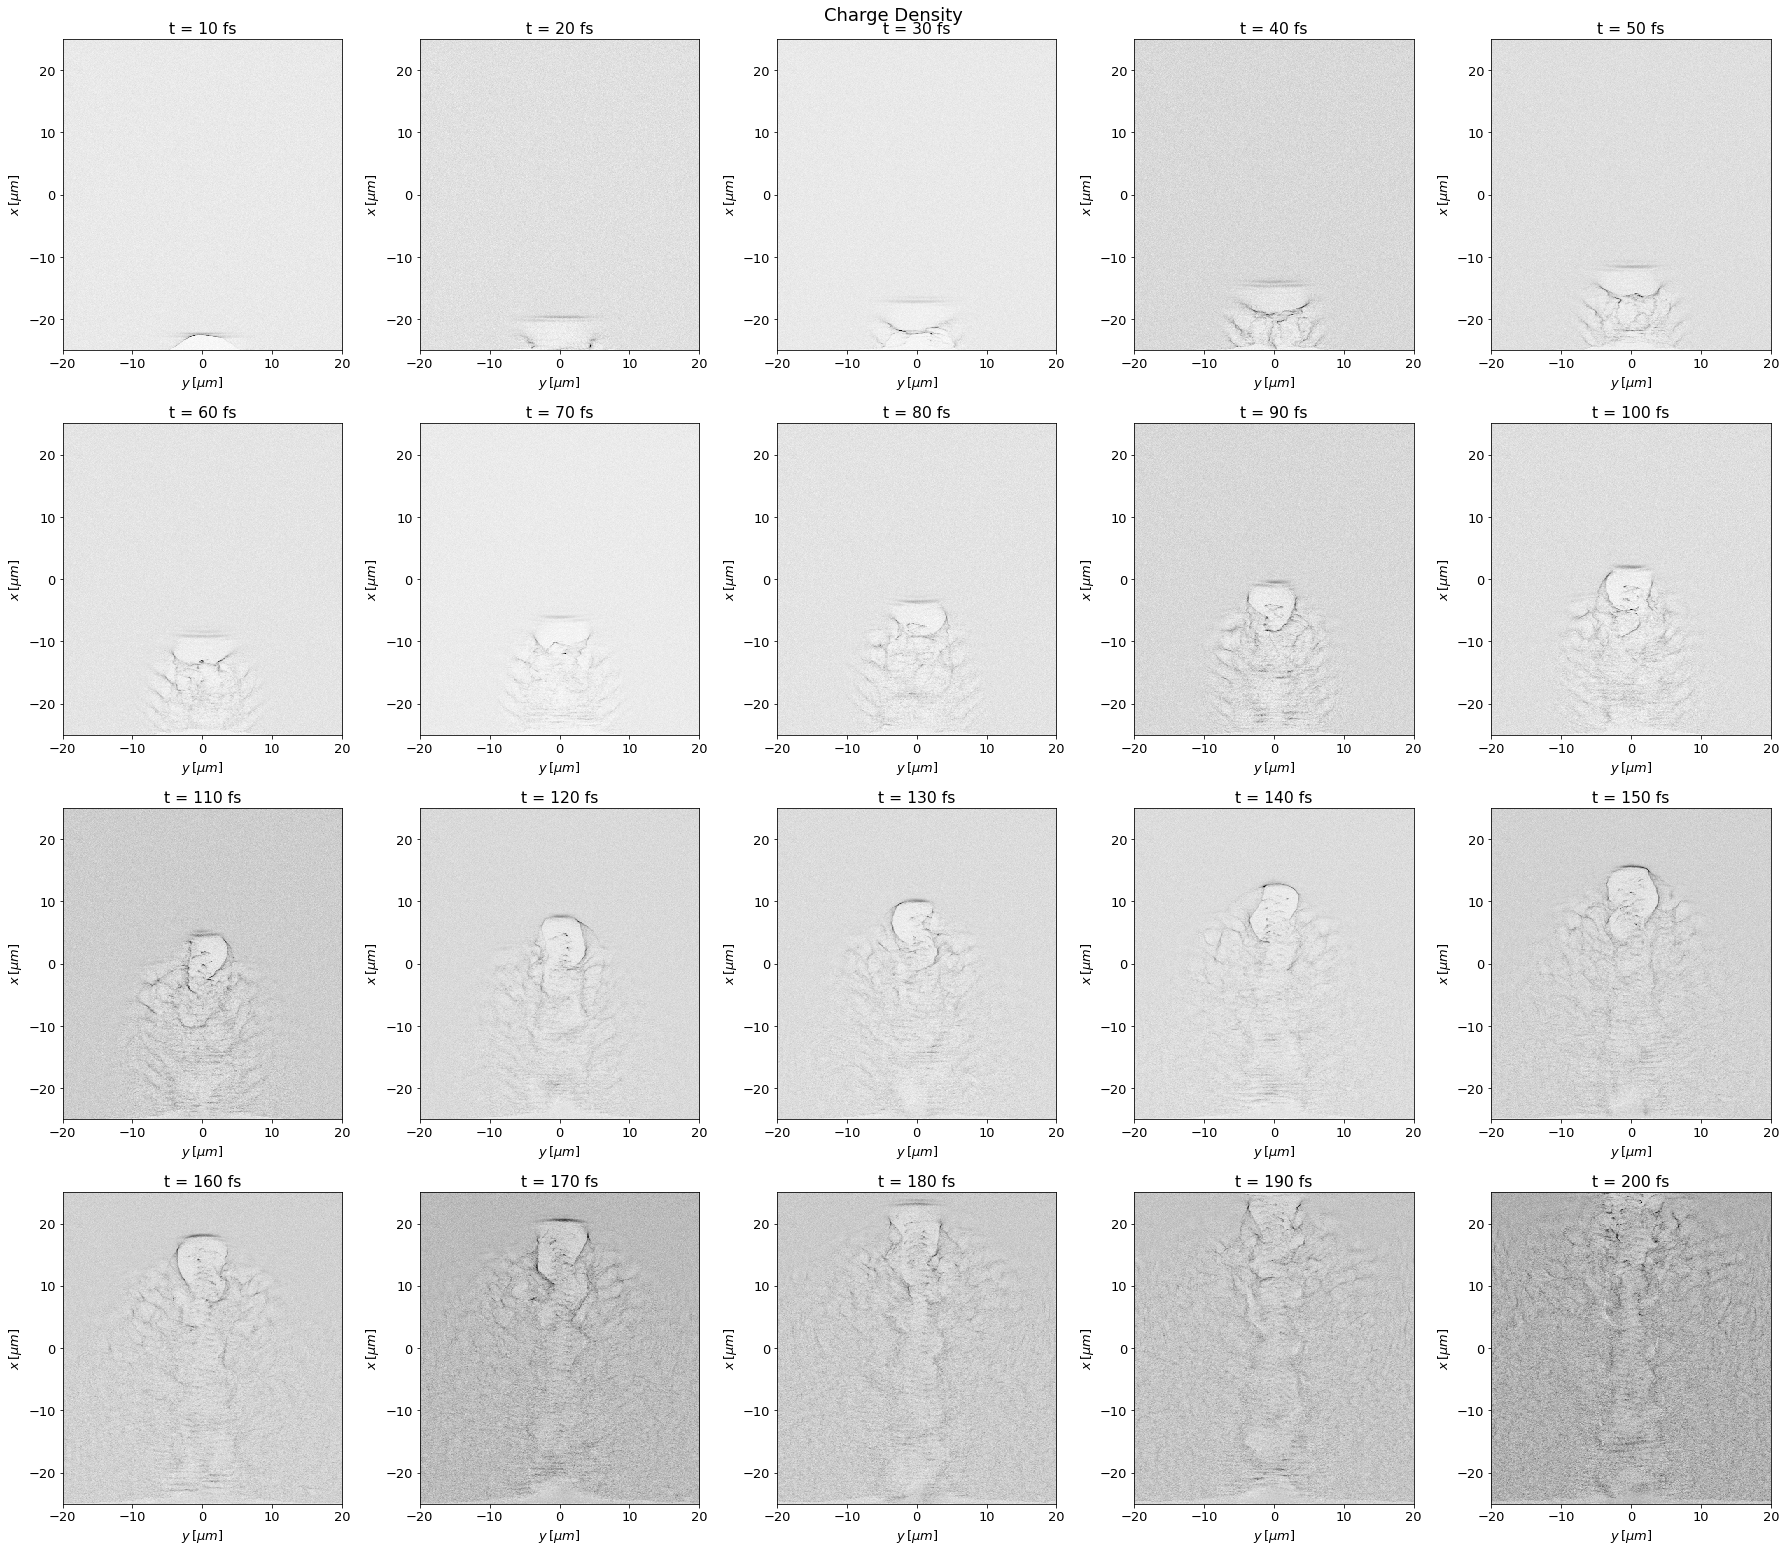

In [34]:
fig, ax = plt.subplots(4, 5, figsize=(25, 22))
i=0
fig.suptitle("Charge Density", fontsize=18)
i=0
for data_dir in all_files[1:]:
    t = i*10
    plot_charge(data_dir, ax[i // 5, i % 5])
    i += 1
fig.tight_layout()